# Solution

# IHLT Lab Exercise 4
## This file contains code to complete the exercise for the fourth lab session of IHLT
Authors:


*   Kacper Poniatowski (kacper.krzysztof.poniatowski@estudiantat.upc.edu)
*   Pau Blanco (pablo.blanco@estudiantat.upc.edu)

### Notes
#### Using 'nltk_models.csv'
The submission zip folder includes a CSV file named 'nltk_models.csv,'. This file is generated after the models complete their runtime. Since our models run five times and can take a while to finish we've included this file for your convenience. Simply upload the file to Google Drive (without renaming it), and this will allow you to display the graphs starting from cell 4 without waiting for the models to finish running.

#### Justification for 5 runs
Repeating experiment runs is crucial when different results can occur from one execution to another. Conducting a single run and accepting the result as is may lead to biased outcomes.

In this case, all algorithms except the Perceptron are deterministic, so repeated runs are not required. Nevertheless, we repeat all experiments to obtain a more objective measure of the execution time variable. Since the experiments are being conducted in an environment over which we have little control, it is advisable to perform repetitions and work with the mean and standard deviation.

# Requirements

In [ ]:
# Run this just once to install python-crfsuite

!pip install python-crfsuite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
# Imports and downloads
import numpy as np
import nltk

nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
# Verification of imported content

print(f"Length of sentences in 'treebank': {len(nltk.corpus.treebank.tagged_sents())}")

# First tagged sentence
print(f"First sentence with POS-tags: {nltk.corpus.treebank.tagged_sents()[1]}")

Length of sentences in 'treebank': 3914
First sentence with POS-tags: [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')]


# Exercise

## Model generation

In [ ]:
from nltk.tag import CRFTagger
import pandas as pd
import time

NREPS = 5

def LID(fd, bins):
  return nltk.probability.LidstoneProbDist(fd, 0.1, bins)

# Create training and test data
train_sizes = [500, 1000, 1500, 2000, 2500, 3000]
test = nltk.corpus.treebank.tagged_sents()[3000:]

# Function to calculate and return accuracy for each model
def calc_models(size):
    train = nltk.corpus.treebank.tagged_sents()[:size]

    # HMM model
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    start_time = time.time()
    HMM = trainer.train_supervised(train)
    hmm_train_time = time.time() - start_time

    # HMM with Lidstone smoothing
    start_time = time.time()
    HMM_LID = trainer.train_supervised(train, estimator=LID)
    hmm_lid_train_time = time.time() - start_time

    # TnT model
    TnT = nltk.tag.tnt.TnT()
    start_time = time.time()
    TnT.train(train)
    tnt_train_time = time.time() - start_time

    # Perceptron model
    PER = nltk.tag.perceptron.PerceptronTagger(load=False)
    start_time = time.time()
    PER.train(train)
    perceptron_train_time = time.time() - start_time

    # CRF model
    CRF = nltk.tag.CRFTagger()
    start_time = time.time()
    CRF.train(train, 'crf_tagger_model')
    crf_train_time = time.time() - start_time

    return [
        size,
        HMM.accuracy(test),
        HMM_LID.accuracy(test),
        TnT.accuracy(test),
        PER.accuracy(test),
        CRF.accuracy(test),
        hmm_train_time,
        hmm_lid_train_time,
        tnt_train_time,
        perceptron_train_time,
        crf_train_time
    ]

# DataFrame to store accuracies and training times
columns = ['train_size', 'MLE', 'MLE_LID', 'TnT', 'Perceptron', 'CRF', 'HMM Time', 'HMM_LID Time', 'TnT Time', 'Perceptron Time', 'CRF Time']
df = pd.DataFrame(columns=columns)

for r in range(NREPS):
  for size in train_sizes:
    print(f"Training models with {size} sentences")
    df.loc[len(df.index)] = calc_models(size)

df = df.sort_values(by='train_size')
print(df)
df.to_csv('nltk_models.csv', index=False)

Training models with 500 sentences


/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Training models with 1000 sentences


/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


Training models with 1500 sentences


/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:334: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:336: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:332: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:364: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


KeyboardInterrupt: 

## Data Loading and Plotting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nltk_models.csv')
# print(df)

grouped_df = df.groupby('train_size').agg(['mean', 'std'])

# Display the resulting DataFrame
#print(grouped_df)
grouped_df.head()

MLE        MLE_LID            TnT      Perceptron            \
                mean  std      mean  std      mean  std       mean       std   
train_size                                                                     
500.0       0.172890  0.0  0.793654  0.0  0.747291  0.0   0.912575  0.001550   
1000.0      0.220721  0.0  0.834794  0.0  0.796288  0.0   0.932804  0.000857   
1500.0      0.261602  0.0  0.859443  0.0  0.827498  0.0   0.940954  0.000373   
2000.0      0.304338  0.0  0.876236  0.0  0.848478  0.0   0.948362  0.000638   
2500.0      0.335118  0.0  0.886467  0.0  0.862292  0.0   0.953430  0.000519   

                 CRF       HMM Time           HMM_LID Time            \
                mean  std      mean       std         mean       std   
train_size                                                             
500.0       0.909562  0.0  0.150180  0.003221     0.149802  0.010567   
1000.0      0.924930  0.0  0.294799  0.006628     0.292194  0.006460   
1500.0      0.933002  0.0  0.459289  0.030057     0.535844  0.127615   
2000.0      0.939175  0.0  0.691891  0.175285     0.703202  0.193195   
2500.0      0.943017  0.0  0.756879  0.008952     0.764136  0.018507   

            TnT Time           Perceptron Time             CRF Time            
                mean       std            mean       std       mean       std  
train_size                                                                     
500.0       0.208222  0.006637        3.383454  0.540224   4.214950  0.564179  
1000.0      0.416801  0.049466        7.005585  0.628714  10.252390  0.545213  
1500.0      0.823174  0.230921       10.355977  0.424836  18.610117  0.902256  
2000.0      0.913038  0.123817       13.929125  0.204894  29.404211  0.182751  
2500.0      1.252296  0.349059       17.187699  0.373929  42.257507  0.817195

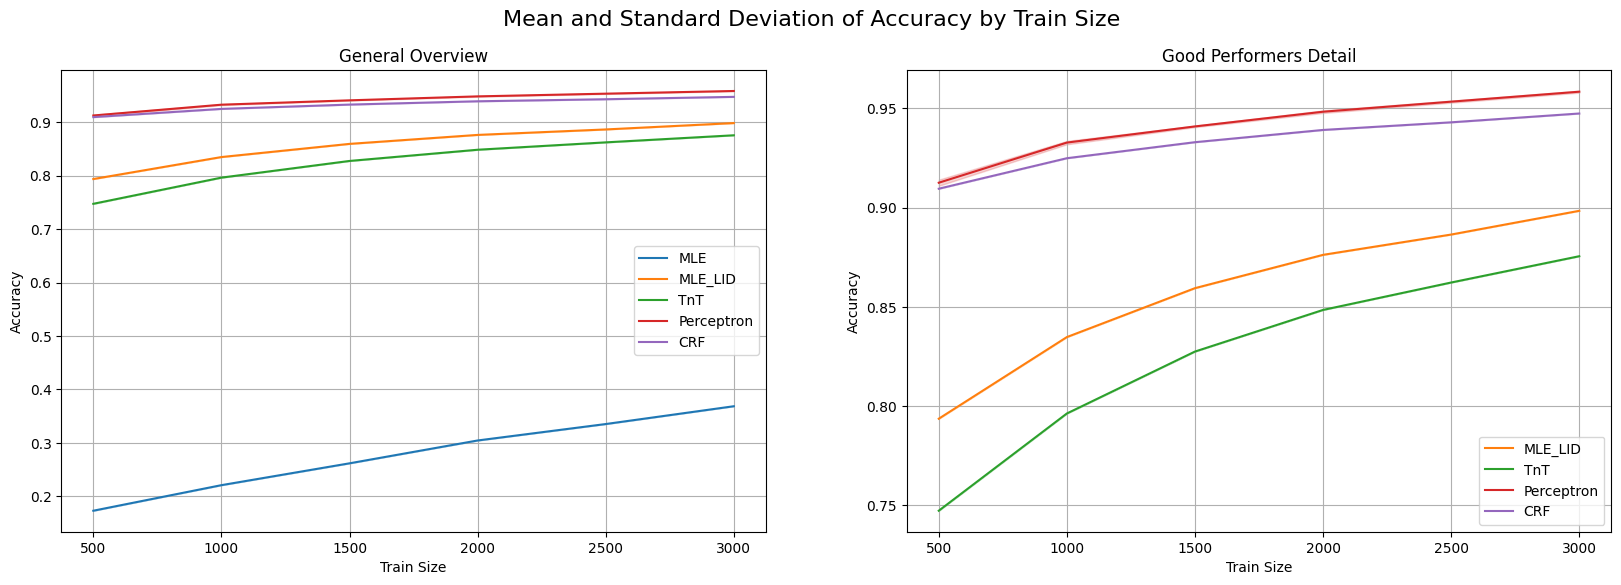

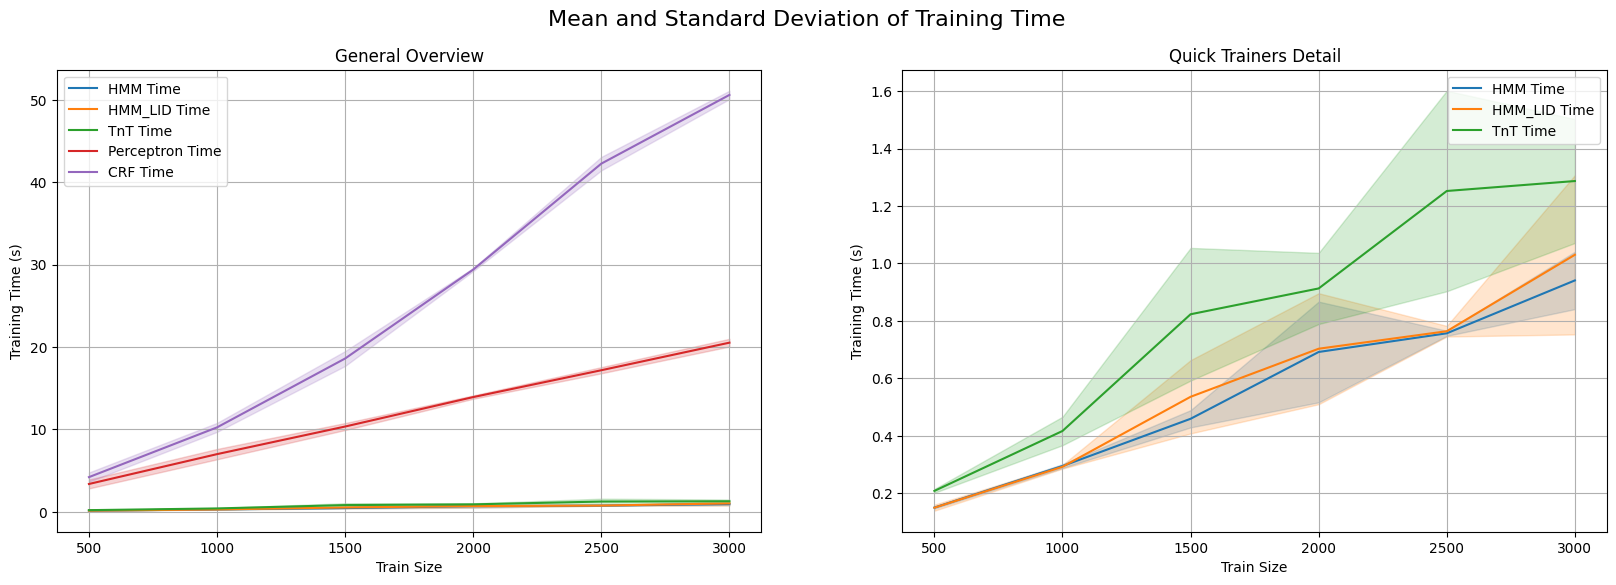

In [ ]:
# Plot accuracies
plt.figure(figsize=(20, 6))
plt.suptitle('Mean and Standard Deviation of Accuracy by Train Size', fontsize=16)

# General overview plot
plt.subplot(1, 2, 1)
colors = plt.colormaps['tab10']
for i, column in enumerate(df.columns[1:6]):
    mean = grouped_df[(column, 'mean')]
    std = grouped_df[(column, 'std')]
    color = colors(i)

    plt.plot(train_sizes, mean, label=column, color=color)
    plt.fill_between(train_sizes, mean - std, mean + std, color=color, alpha=0.2)

plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('General Overview')
plt.legend()
plt.grid(True)

# Good performers detail plot
plt.subplot(1, 2, 2)
for i, column in enumerate(df.columns[2:6]):
    mean = grouped_df[(column, 'mean')]
    std = grouped_df[(column, 'std')]
    color = colors(i + 1)  # Shift the color index

    plt.plot(train_sizes, mean, label=column, color=color)
    plt.fill_between(train_sizes, mean - std, mean + std, color=color, alpha=0.2)

plt.xlabel('Train Size')
plt.ylabel('Accuracy')
plt.title('Good Performers Detail')
plt.legend()
plt.grid(True)

# Plot accuracies
plt.figure(figsize=(20, 6))
plt.suptitle('Mean and Standard Deviation of Training Time', fontsize=16)

plt.subplot(1, 2, 1)
colors = plt.colormaps['tab10']  # Get the colormap directly
for i, column in enumerate(df.columns[6:]):
    mean = grouped_df[(column, 'mean')]
    std = grouped_df[(column, 'std')]
    color = colors(i)

    plt.plot(train_sizes, mean, label=column, color=color)
    plt.fill_between(train_sizes, mean - std, mean + std, color=color, alpha=0.2)

# Add labels and legend
plt.xlabel('Train Size')
plt.ylabel('Training Time (s)')
plt.title('General Overview')
plt.legend()
plt.grid(True)

# Detail plot for specific training times
plt.subplot(1, 2, 2)
for i, column in enumerate(df.columns[6:9]):
    mean = grouped_df[(column, 'mean')]
    std = grouped_df[(column, 'std')]
    color = colors(i)  # Keep the same color for consistency

    plt.plot(train_sizes, mean, label=column, color=color)
    plt.fill_between(train_sizes, mean - std, mean + std, color=color, alpha=0.2)

# Add labels and legend
plt.xlabel('Train Size')
plt.ylabel('Training Time (s)')
plt.title('Quick Trainers Detail')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

### Notes about the Standard Deviations

In relation to the Accuracy graphs, we can observe how the shading of the Perceptron line, indicating the standard deviation, is negligible. This gives us an idea of the consistency of the results obtained in different runs. For the rest of the curves, we obviously cannot have shading since, being deterministic, the result is always the same.


On the other hand, in the case of execution time, we can observe that all the curves have some deviation. For the CRT and Perceptron cases, the two models that take the longest, we can see that the shadows are very close to the mean and quite separated between models. This gives us an idea that the results are quite consistent.

In the case of the detail of the three fastest models, in the graph on the right, we can see which models perform better. It is also worth noting that there seems to be higher variability in these models. It should be emphasized that this is more due to the amplification of the scale on the Y-axis than to variability that, in absolute numbers, is not greater than that observed in the other models.





After evaluating the performance of each model using different sized datasets, we observed the following:

### Accuracy
- Perceptron outperforms the other models in terms of accuracy - especially with larger training sets. For example, when trained on 3000 sentences, CRF achieves an accuracy of 95.8%

- CRF also performs competitively with an accuracy of 94.75% at 3000 sentences. Although it slightly trails Preceptron, both models have very accurate results.

- HMM (Lidstone Smoothing) shows significant improvements over the basic HMM model. At 3000 sentences, HMM with Lidstone smoothing achieves 89.84%, while the basic HMM has an accuracy of 36.84%.

- TnT provides decent performance, with an accuracy of 87.55% on the full dataset which is lower than CRF, Perceptron and HMM (Lidstone Smoothing), but signicifcantly higher than HMM.

### Training Time:
- CRF, while accurate, has by far the highest training time. For example, at 3000 sentences, CRF took approximately 44.57 seconds to train. This makes it the slowest model to train - especially for larger datasets. As the dataset size increases, the increase in time to train is the greatest of the 5 models.

- Perceptron is faster to train than CRF taking 20.29 seconds at 3000 sentences, but still significantly slower than the other models we trained.

- HMM (Lidstone Smoothing) trains very quickly, requiring only 0.88 seconds on the full dataset. The basic HMM model is marginally quicker than HMM (Lidstone Smoothing), with a training time of 0.879 seconds and is the quickest model to train (not rounded to 2 decimal places to signify HMM and HMM (Lidstone Smoothing) are not identical in training time).

- TnT also offers rapid training time, with a time of 1.18 seconds on the full dataset.

### Table of Output Data

Table displaying all of the output data generated by our model runs (rounded to 4 decimal places).

| train_size |   MLE   | MLE_LID |   TnT   | Perceptron |   CRF   | HMM Time | HMM_LID Time | TnT Time | Perceptron Time | CRF Time |
|------------|---------|---------|---------|------------|---------|----------|--------------|----------|-----------------|----------|
| 500        | 0.1729  | 0.7937  | 0.7473  | 0.9134     | 0.9096  | 0.1488   | 0.1463       | 0.2158   | 4.3322          | 3.6471   |
| 500        | 0.1729  | 0.7937  | 0.7473  | 0.9099     | 0.9096  | 0.1478   | 0.1686       | 0.2063   | 3.0977          | 3.6764   |
| 500        | 0.1729  | 0.7937  | 0.7473  | 0.9137     | 0.9096  | 0.1477   | 0.1446       | 0.1988   | 3.3196          | 4.7614   |
| 500        | 0.1729  | 0.7937  | 0.7473  | 0.9133     | 0.9096  | 0.1512   | 0.1455       | 0.2071   | 3.0520          | 4.1745   |
| 500        | 0.1729  | 0.7937  | 0.7473  | 0.9125     | 0.9096  | 0.1554   | 0.1440       | 0.2131   | 3.1157          | 4.8153   |
| 1000       | 0.2207  | 0.8348  | 0.7963  | 0.9329     | 0.9249  | 0.3017   | 0.2859       | 0.3876   | 7.3814          | 10.5280  |
| 1000       | 0.2207  | 0.8348  | 0.7963  | 0.9333     | 0.9249  | 0.3008   | 0.2874       | 0.4003   | 6.3718          | 10.7143  |
| 1000       | 0.2207  | 0.8348  | 0.7963  | 0.9339     | 0.9249  | 0.2943   | 0.2955       | 0.5048   | 7.4235          | 9.8377   |
| 1000       | 0.2207  | 0.8348  | 0.7963  | 0.9320     | 0.9249  | 0.2861   | 0.2904       | 0.3990   | 6.2734          | 10.6723  |
| 1000       | 0.2207  | 0.8348  | 0.7963  | 0.9320     | 0.9249  | 0.2910   | 0.3017       | 0.3924   | 7.5778          | 9.5098   |
| 1500       | 0.2616  | 0.8594  | 0.8275  | 0.9408     | 0.9330  | 0.4404   | 0.5967       | 1.1345   | 10.0833         | 19.8497  |
| 1500       | 0.2616  | 0.8594  | 0.8275  | 0.9409     | 0.9330  | 0.5099   | 0.7334       | 0.9927   | 9.7769          | 19.2989  |
| 1500       | 0.2616  | 0.8594  | 0.8275  | 0.9404     | 0.9330  | 0.4428   | 0.4580       | 0.5798   | 10.7974         | 18.0282  |
| 1500       | 0.2616  | 0.8594  | 0.8275  | 0.9413     | 0.9330  | 0.4392   | 0.4420       | 0.6942   | 10.4323         | 17.9275  |
| 1500       | 0.2616  | 0.8594  | 0.8275  | 0.9413     | 0.9330  | 0.4640   | 0.4491       | 0.7147   | 10.6900         | 17.9463  |
| 2000       | 0.3043  | 0.8762  | 0.8485  | 0.9488     | 0.9392  | 0.6197   | 0.6047       | 0.8032   | 13.8254         | 29.5091  |
| 2000       | 0.3043  | 0.8762  | 0.8485  | 0.9479     | 0.9392  | 0.6024   | 0.6433       | 0.9262   | 13.7916         | 29.5707  |
| 2000       | 0.3043  | 0.8762  | 0.8485  | 0.9479     | 0.9392  | 1.0052   | 1.0477       | 1.1082   | 13.9696         | 29.1277  |
| 2000       | 0.3043  | 0.8762  | 0.8485  | 0.9480     | 0.9392  | 0.6215   | 0.6130       | 0.9192   | 13.7881         | 29.3109  |
| 2000       | 0.3043  | 0.8762  | 0.8485  | 0.9492     | 0.9392  | 0.6107   | 0.6074       | 0.8084   | 14.2708         | 29.5027  |
| 2500       | 0.3351  | 0.8865  | 0.8623  | 0.9529     | 0.9430  | 0.7530   | 0.7607       | 0.9984   | 17.2638         | 43.6002  |
| 2500       | 0.3351  | 0.8865  | 0.8623  | 0.9536     | 0.9430  | 0.7648   | 0.7945       | 1.6833   | 17.5720         | 41.7674  |
| 2500       | 0.3351  | 0.8865  | 0.8623  | 0.9532     | 0.9430  | 0.7605   | 0.7513       | 0.9999   | 16.7087         | 42.4785  |
| 2500       | 0.3351  | 0.8865  | 0.8623  | 0.9542     | 0.9430  | 0.7431   | 0.7663       | 0.9979   | 16.9002         | 41.7584  |
| 2500       | 0.3351  | 0.8865  | 0.8623  | 0.9532     | 0.9430  | 0.7631   | 0.7479       | 1.5820   | 17.4938         | 41.6829  |
| 3000       | 0.3684  | 0.8984  | 0.8755  | 0.9580     | 0.9475  | 1.1190   | 1.5255       | 1.6721   | 20.2498         | 51.2865  |
| 3000       | 0.3684  | 0.8984  | 0.8755  | 0.9580     | 0.9475  | 0.8983   | 0.8910       | 1.2044   | 20.8295         | 50.2386  |
| 3000       | 0.3684  | 0.8984  | 0.8755  | 0.9585     | 0.9475  | 0.8996   | 0.9271       | 1.1734   | 19.8423         | 50.5955  |
| 3000       | 0.3684  | 0.8984  | 0.8755  | 0.9592     | 0.9475  | 0.8826   | 0.8937       | 1.1925   | 20.9272         | 49.9959  |
| 3000       | 0.3684  | 0.8984  | 0.8755  | 0.9586     | 0.9475  | 0.9054   | 0.9139       | 1.1923   | 20.8125         | 50.8619  |



### Which Model to Choose?

Which model we would select depends on the definition our selection criteria.

1. If you are working with any sized dataset where accuracy is top priority, and computational cost is not a factor the Perceptron model is the best choice as it delivers the highest accuracy across all training sizes, and trains significantly quicker than CRF.

2. If training time is a critical factor and you are willing to sacrifice some accuracy, HMM with Lidstone Smoothing is a great choice as it offers solid accuracy performance with very efficient training times.

It is also important to note that the performance of these models is dependent on the characteristics of the dataset being used. While the Perceptron model outperformed CRF on this dataset ("treebank"), this may not be the case for other datasets. The treebank dataset is relatively simple, with high quality annotations and straightforward POS tags. CRF may perform better than Perceptron on more complex datasets.